In [2]:
import matplotlib
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from bisect import bisect

[  1.   3.   5.   7.   9.  11.]


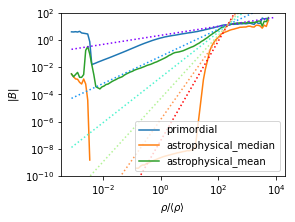

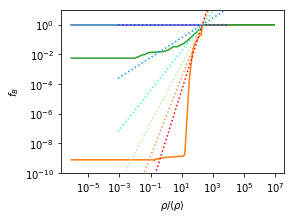

In [47]:
#fig, axs = plt.subplots(1,2,figsize=(8,3))

fig, ax1 = plt.subplots(1,1,figsize=(4,3))
fig, ax2 = plt.subplots(1,1,figsize=(4,3))
axs=[ax1,ax2]

root = '/hummel/MHD-models/clues/'
filename_relation = root+'2018/'+"B_renorm_alpha%i-3rd.txt"

primordial = np.genfromtxt( root + 'rho2B_primordial_median.txt', names=True )
rho = primordial['density']
B = primordial['B']*1e12
axs[0].loglog(rho, B, label='primordial')

astrophysical = np.genfromtxt( root + 'rho2B_astrophysical_median.txt', names=True )
rho_ = astrophysical['density']
B_ = astrophysical['B']*1e13
axs[0].loglog(rho_, B_, label='astrophysical_median')

astrophysical = np.genfromtxt( root + 'rho2B_astrophysical_mean.txt', names=True )
rho_ = astrophysical['density']
B__ = astrophysical['B']*1e13
axs[0].loglog(rho_, B__, label='astrophysical_mean')

primordial = np.genfromtxt( root + '2018/B_renorm_primordial.txt', names=True )
rho_ = primordial['density']
f = primordial['Renorm']
axs[1].plot(rho_, f)

astrophysical = np.genfromtxt( root + '2018/B_renorm_astrophysical_median.txt', names=True )
rho_ = astrophysical['density']
f = astrophysical['Renorm']
axs[1].plot(rho_, f)

astrophysical = np.genfromtxt( root + '2018/B_renorm_astrophysical_mean.txt', names=True )
rho_ = astrophysical['density']
f = astrophysical['Renorm']
axs[1].plot(rho_, f)


# density, above which B is known, i. e. is the same throughout all scenarios
rho0 = 2e2
i_0 = bisect(rho, rho0)
rho_0 = rho[i_0]
B_0 = B[i_0]


alphas = np.linspace(1,11,6) / 3
print alphas*3
colors = rainbow( np.linspace(0,1,len(alphas)) )
for alpha, color in zip(alphas,colors):
    ## find B_0, such that B matches with known value at rho0
    B0 = B_0/rho_0**alpha
    B_ = rho**alpha * B0
    if alpha == alphas[0]:
        B = B_
    ## B renormalization factor
    renorm = B_/B
    renorm[i_0] = renp
    axs[0].loglog(rho, B_, linestyle=':', color=color )# , label=r"$\alpha$ = %.1f" % alpha)
    axs[1].loglog(rho, B_/B, linestyle=':', color=color )# , label=r"$\alpha$ = %.1f" % alpha)
    if True:
        with open( filename_relation % int(alpha*3), 'w' ) as f:
            f.write( "%s\t\t%s\n" % ( "density", "Renorm" ) )
            for d, r in zip( rho, renorm ):
                f.write( "%e\t%e\n" % ( d, r ) )
            f.write( "%e\t%e\n" % ( rho[-1], 1 ) )



axs[0].legend()
#axs[1].legend()
#axs[0].set_xlim(1e-2,1e3)
axs[0].set_ylim(1e-10,100)
axs[1].set_ylim(1e-10,10)
axs[0].set_xlabel(r"$\rho/\langle\rho\rangle$")
axs[1].set_xlabel(r"$\rho/\langle\rho\rangle$")
axs[0].set_ylabel(r"$|B|$")
axs[1].set_ylabel(r"$f_B$")

plt.show()

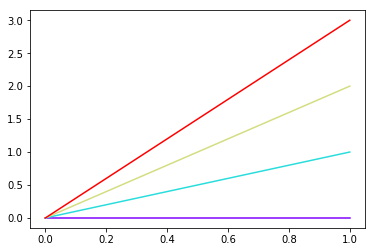

In [71]:
N=4
colors= rainbow(np.linspace(0,1,N))
for i in range(N):
    plt.plot( [0,1],[0,i], color=colors[i] )

In [45]:
alphas = np.linspace(1,11,6) / 3
print alphas*3


[  1.   3.   5.   7.   9.  11.]
